In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
server_test_results_raw = pd.read_csv("../test_server_results.csv")
server_test_results_raw.head()

,accuracy,round,timestamp,session_uuid
0,0.9210,0,2023-05-21 18:33:52.545013,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
1,0.9427,1,2023-05-21 18:33:57.489007,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
2,0.9515,2,2023-05-21 18:34:03.886010,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
3,0.9622,3,2023-05-21 18:34:10.184757,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
4,0.9669,4,2023-05-21 18:34:16.288754,4b03c3ea-055c-49a2-aebb-a48c18ed81b7


In [4]:
client_test_results_raw = pd.read_csv("../test_client_results.csv")
client_test_results_raw.head()

,uuid,ipv4,port,accuracy,loss,round,timestamp,session_uuid
0,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.927,0.272055,0,2023-05-21 18:33:52.526007,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
1,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.949,0.168748,1,2023-05-21 18:33:57.234012,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
2,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.946,0.149910,2,2023-05-21 18:34:03.604009,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
3,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.965,0.111979,3,2023-05-21 18:34:09.930762,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
4,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.960,0.118008,4,2023-05-21 18:34:16.105764,4b03c3ea-055c-49a2-aebb-a48c18ed81b7


In [5]:
client_train_results_raw = pd.read_csv("../train_client_results.csv")
client_train_results_raw.head()

,uuid,ipv4,port,accuracy,loss,round,timestamp,session_uuid
0,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.903611,0.316070,1,2023-05-21 18:33:56.775002,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
1,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.921333,0.264677,2,2023-05-21 18:33:59.669017,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
2,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.940000,0.208374,3,2023-05-21 18:34:06.675010,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
3,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.948667,0.179368,4,2023-05-21 18:34:14.131769,4b03c3ea-055c-49a2-aebb-a48c18ed81b7
4,000e2375-c107-4e17-abfb-64ba285e4a3d,localhost,7294,0.957333,0.147306,5,2023-05-21 18:34:19.222761,4b03c3ea-055c-49a2-aebb-a48c18ed81b7


In [6]:
SESSION_ID = '000d635f-2206-4ab3-99b2-bd49a3c75fad'

In [7]:
client_train_results_df = client_train_results_raw[client_train_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)
client_test_results_df = client_test_results_raw[client_test_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)
server_test_results_df = server_test_results_raw[server_test_results_raw['session_uuid'] == SESSION_ID].reset_index(drop=True)

In [8]:
client_train_results_df.head()

,uuid,ipv4,port,accuracy,loss,round,timestamp,session_uuid
0,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.789000,0.656785,0,2023-05-21 19:09:10.275999,000d635f-2206-4ab3-99b2-bd49a3c75fad
1,501a631d-70b5-4711-ac43-af5e08f4fac2,localhost,2541,0.776333,0.660403,0,2023-05-21 19:09:10.326002,000d635f-2206-4ab3-99b2-bd49a3c75fad
2,cf890c34-4a36-4df1-b1cc-92f83db335d3,localhost,2072,0.794000,0.629047,0,2023-05-21 19:09:10.453014,000d635f-2206-4ab3-99b2-bd49a3c75fad
3,dfad836d-9fbe-4294-a63d-039f0b1c95c1,localhost,8497,0.783000,0.665011,0,2023-05-21 19:09:11.008020,000d635f-2206-4ab3-99b2-bd49a3c75fad
4,c3cb635e-e32a-43d9-9dc2-058a8b939e3d,localhost,5497,0.796000,0.656437,0,2023-05-21 19:09:11.426016,000d635f-2206-4ab3-99b2-bd49a3c75fad


In [9]:
client_train_results_per_trainer = [client_train_results_df[client_train_results_df['uuid'] == uuid] for uuid in client_train_results_df['uuid'].unique()]

In [10]:
client_train_results_per_trainer[0]

,uuid,ipv4,port,accuracy,loss,round,timestamp,session_uuid
0,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.789000,0.656785,0,2023-05-21 19:09:10.275999,000d635f-2206-4ab3-99b2-bd49a3c75fad
11,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.907333,0.307111,1,2023-05-21 19:09:15.993011,000d635f-2206-4ab3-99b2-bd49a3c75fad
16,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.921000,0.259991,2,2023-05-21 19:09:21.645004,000d635f-2206-4ab3-99b2-bd49a3c75fad
31,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.932000,0.210502,3,2023-05-21 19:09:29.736000,000d635f-2206-4ab3-99b2-bd49a3c75fad
38,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.948889,0.167964,4,2023-05-21 19:09:35.146744,000d635f-2206-4ab3-99b2-bd49a3c75fad
39,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.955000,0.161685,5,2023-05-21 19:09:38.737754,000d635f-2206-4ab3-99b2-bd49a3c75fad
44,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.955667,0.155751,6,2023-05-21 19:09:43.233764,000d635f-2206-4ab3-99b2-bd49a3c75fad
55,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.968333,0.109298,7,2023-05-21 19:09:48.829745,000d635f-2206-4ab3-99b2-bd49a3c75fad
64,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.964000,0.120515,8,2023-05-21 19:09:53.908750,000d635f-2206-4ab3-99b2-bd49a3c75fad
69,1f7e9da9-3d5c-422c-96cc-a8acc454b312,localhost,4205,0.969333,0.102099,9,2023-05-21 19:09:58.303750,000d635f-2206-4ab3-99b2-bd49a3c75fad


In [11]:
client_test_results_per_trainer = [client_test_results_df[client_test_results_df['uuid'] == uuid].reset_index(drop=True) for uuid in client_test_results_df['uuid'].unique()]

In [12]:
client_test_results_per_trainer[0]

,uuid,ipv4,port,accuracy,loss,round,timestamp,session_uuid
0,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.914,0.283182,0,2023-05-21 19:09:13.002007,000d635f-2206-4ab3-99b2-bd49a3c75fad
1,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.945,0.199013,1,2023-05-21 19:09:18.500003,000d635f-2206-4ab3-99b2-bd49a3c75fad
2,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.952,0.155406,2,2023-05-21 19:09:24.449001,000d635f-2206-4ab3-99b2-bd49a3c75fad
3,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.962,0.141147,3,2023-05-21 19:09:31.723753,000d635f-2206-4ab3-99b2-bd49a3c75fad
4,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.954,0.164875,4,2023-05-21 19:09:35.937750,000d635f-2206-4ab3-99b2-bd49a3c75fad
5,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.967,0.102883,6,2023-05-21 19:09:45.258749,000d635f-2206-4ab3-99b2-bd49a3c75fad
6,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.965,0.103924,7,2023-05-21 19:09:50.291745,000d635f-2206-4ab3-99b2-bd49a3c75fad
7,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.980,0.070574,8,2023-05-21 19:09:55.336741,000d635f-2206-4ab3-99b2-bd49a3c75fad
8,85066c9d-0d65-4e31-92b4-2bf8b617ba6a,localhost,7117,0.969,0.097581,9,2023-05-21 19:10:00.276746,000d635f-2206-4ab3-99b2-bd49a3c75fad


## Analysing training results

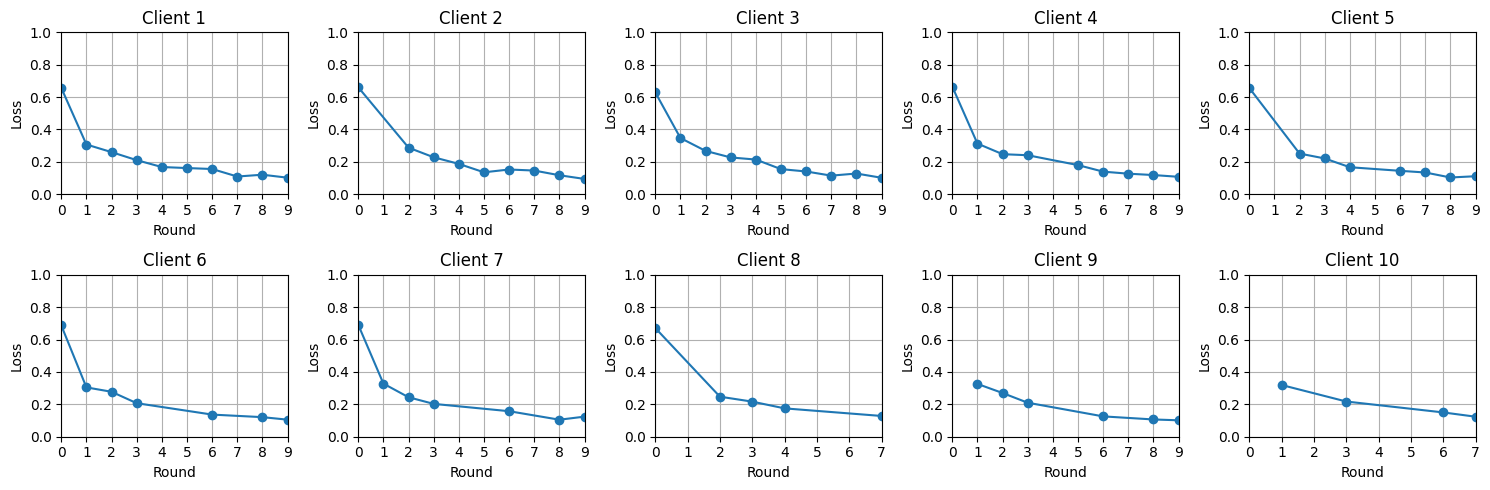

In [13]:
row = 2
col = 5

fig, axs = plt.subplots(row, col, figsize=(15, 5))

for i in range(row):
    for j in range(col):
        axs[i, j].plot(client_train_results_per_trainer[i*col + j]['round'], client_train_results_per_trainer[i*col + j]['loss'], marker='o')
        axs[i, j].set_title(f"Client {i*col + j + 1}")
        axs[i, j].set_xlabel("Round")
        axs[i, j].set_ylabel("Loss")
        axs[i, j].set_ylim(0, 1)
        axs[i, j].set_xlim(0, max(client_train_results_per_trainer[i*col + j]['round']))
        axs[i, j].set_xticks(range(0, max(client_train_results_per_trainer[i*col + j]['round']) + 1, 1))
        axs[i, j].grid()

fig.tight_layout()
plt.savefig(f"train_loss_{SESSION_ID}.png")

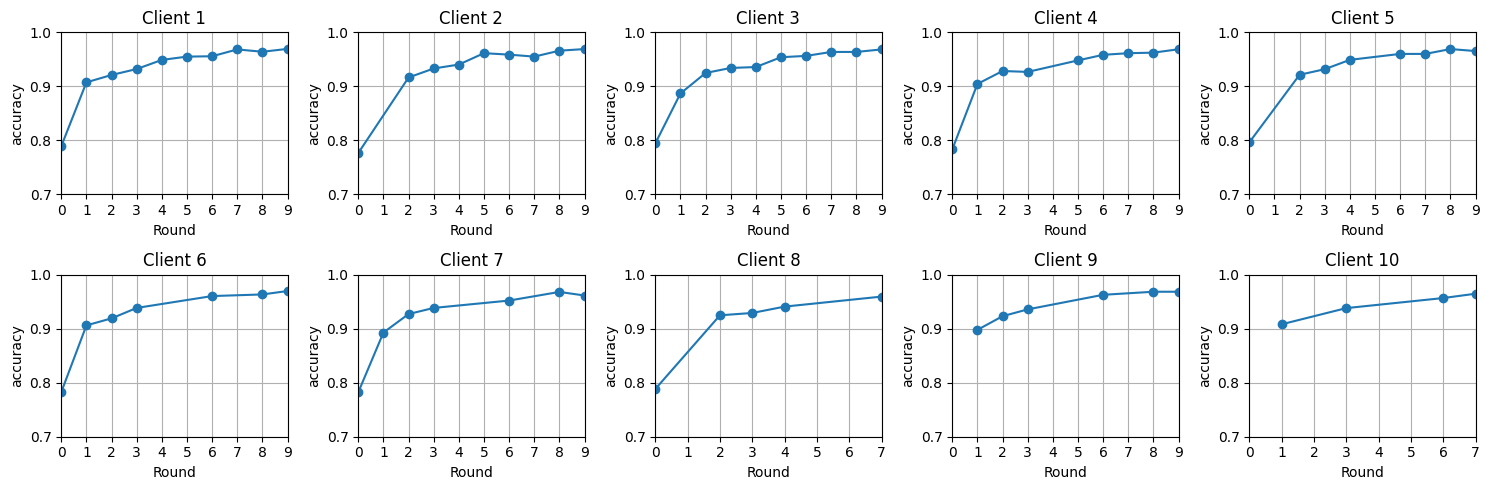

In [14]:
row = 2
col = 5

fig, axs = plt.subplots(row, col, figsize=(15, 5))

for i in range(row):
    for j in range(col):
        axs[i, j].plot(client_train_results_per_trainer[i*col + j]['round'], client_train_results_per_trainer[i*col + j]['accuracy'], marker='o')
        axs[i, j].set_title(f"Client {i*col + j + 1}")
        axs[i, j].set_xlabel("Round")
        axs[i, j].set_ylabel("accuracy")
        axs[i, j].set_ylim(0.7, 1)
        axs[i, j].set_xlim(0, max(client_train_results_per_trainer[i*col + j]['round']))
        axs[i, j].set_xticks(range(0, max(client_train_results_per_trainer[i*col + j]['round']) + 1, 1))
        axs[i, j].grid()

fig.tight_layout()
plt.savefig(f"train_acc_{SESSION_ID}.png")

## Analysing server test results

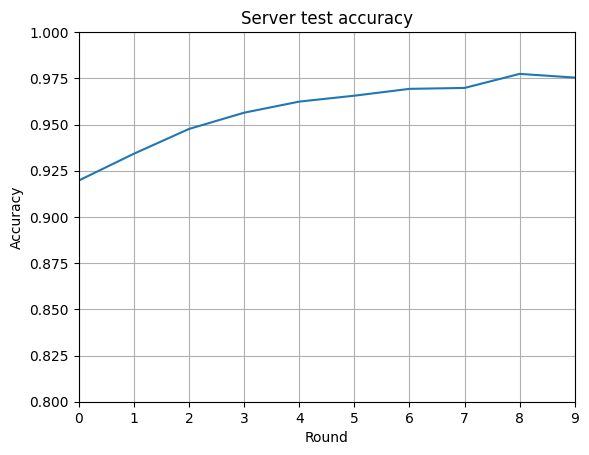

In [15]:
plt.plot(server_test_results_df['round'], server_test_results_df['accuracy'])
plt.title("Server test accuracy")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1)
plt.xlim(0, max(server_test_results_df['round']))
plt.grid()

plt.savefig(f"server_test_acc_{SESSION_ID}.png")


## Analyzing test results for different amount of rounds

In [16]:
server_test_results_10df = server_test_results_df

In [17]:
server_test_results_20df = server_test_results_raw[server_test_results_raw['session_uuid'] == 'f7ba8079-9c60-4f21-ab92-f4715fa4c1e9'].reset_index(drop=True)
server_test_results_40df = server_test_results_raw[server_test_results_raw['session_uuid'] == '43a1bcbf-ce48-42c2-b5b3-fb48d8685482'].reset_index(drop=True)

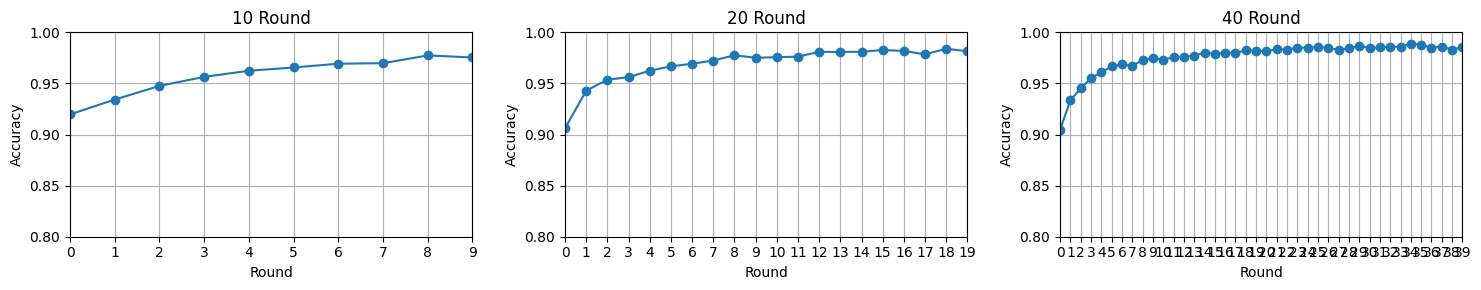

In [18]:
col = 3
row = 1

fig, axs = plt.subplots(row, col, figsize=(15, 3))

axs[0].plot(server_test_results_10df['round'], server_test_results_10df['accuracy'], marker='o')
axs[0].set_title("10 Round")
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Accuracy")
axs[0].set_ylim(0.8, 1)
axs[0].set_xlim(0, max(server_test_results_10df['round']))
axs[0].set_xticks(range(0, max(server_test_results_10df['round']) + 1, 1))
axs[0].grid()

axs[1].plot(server_test_results_20df['round'], server_test_results_20df['accuracy'], marker='o')
axs[1].set_title("20 Round")
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim(0.8, 1)
axs[1].set_xlim(0, max(server_test_results_20df['round']))
axs[1].set_xticks(range(0, max(server_test_results_20df['round']) + 1, 1))
axs[1].grid()

axs[2].plot(server_test_results_40df['round'], server_test_results_40df['accuracy'], marker='o')
axs[2].set_title("40 Round")
axs[2].set_xlabel("Round")
axs[2].set_ylabel("Accuracy")
axs[2].set_ylim(0.8, 1)
axs[2].set_xlim(0, max(server_test_results_40df['round']))
axs[2].set_xticks(range(0, max(server_test_results_40df['round']) + 1, 1))
axs[2].grid()

fig.tight_layout()

plt.savefig(f"server_test_acc_10_20_40.png")